In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Exercise 3: Global Warming (4 Points)
Get the data from “BerkeleyEarth GlobalLandTemperature.dat” from the GitHub data di- rectory: https://github.com/aotownsend/StatMethods2022/... The objective of the exercise is to measure the weighted mean temperature per bin of 10 years.
#### 1. Create a function to read the data.

In [3]:
data = np.genfromtxt(r'/Users/Ida/Desktop/Stat. Methoden der Datenanalyse/StatMethods2022/notebooks/data/BerkeleyEarth_GlobalLandTemperature.dat')
                     #skip_header=1,
                     #skip_footer=1,
                     #names=True,
                     #dtype=None,
                     #delimiter=' ')

In [7]:
#Year, Month,  Monthly_Anomaly, Monthly_Unc,  Annual_Anomaly, Annual_Unc, 
#5year_Anomaly  5year_Unc,  10year_Anomaly, 10year_Unc,  20year_Anomaly, 20year_Unc 

1834.0


In [62]:
Year, Month, Monthly_Anomaly, Monthly_Unc = [],[],[],[]
Annual_Anomaly, Annual_Unc, o5year_Anomaly, o5year_Unc, = [],[],[],[]
o10year_Anomaly, o10year_Unc, o20year_Anomaly, o20year_Unc = [],[],[],[]
for i in range(len(data)):
    Year.append(int(data[i][0])) 
    Month.append(int(data[i][1]))   
    Monthly_Anomaly.append(data[i][2])
    Monthly_Unc.append(data[i][3])
    Annual_Anomaly.append(data[i][4])
    Annual_Unc.append(data[i][5])
    o5year_Anomaly.append(data[i][6])
    o5year_Unc.append(data[i][7])
    o10year_Anomaly.append(data[i][8]) 
    o10year_Unc.append(data[i][9])
    o20year_Anomaly.append(data[i][10])
    o20year_Unc.append(data[i][11])

#### 2. Plot the data.
Hint: Look at the errorbar (or fill between) methods of matplotlib (similar to plot).


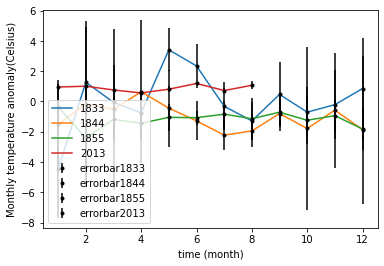

In [42]:
plt.figure(figsize=(12, 5))
years = [1833,1844,1855,2013]  
plt.title('Monthly temperature anomaly in differnet years')
for year in years:
    if year != 2013:
        a = Year.index(year)
        plt.plot(Month[0:12], Monthly_Anomaly[a:a+12], label = (year))
        plt.errorbar(Month[0:12], Monthly_Anomaly[a:a+12] , yerr = Monthly_Unc[a:a+12],fmt='.k', label = ("errorbar "+str(year)))
    else: 
        a = Year.index(year)
        plt.plot(Month[0:8], Monthly_Anomaly[a:a+8], label = (year))
        plt.errorbar(Month[0:8], Monthly_Anomaly[a:a+8] , yerr = Monthly_Unc[a:a+12], fmt='.k', label = ("errorbar "+str(year))) 
plt.xlabel("time (month)")
plt.ylabel("Monthly temperature anomaly(Celsius)")        
plt.legend()

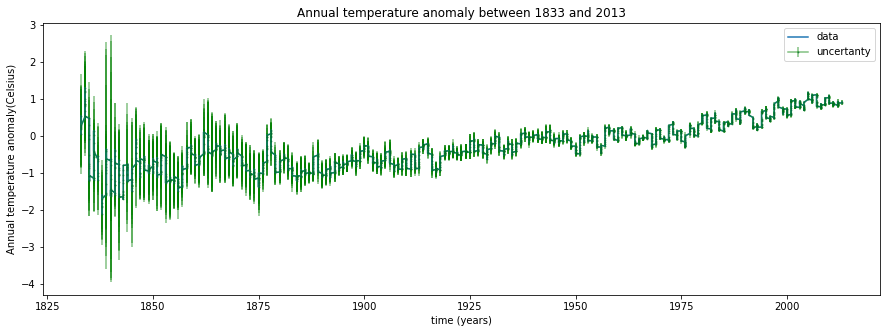

In [77]:
plt.figure(figsize=(15, 5))
plt.title('Annual temperature anomaly between 1833 and 2013')
plt.plot(Year, Annual_Anomaly, label = "data")
plt.errorbar(Year, Annual_Anomaly,yerr = Annual_Unc, marker =".", mfc='blue',mec= "green", ms=2, color = "green",alpha = 0.5, label = "uncertanty")
plt.xlabel("time (years)")
plt.ylabel("Annual temperature anomaly(Celsius)") 
plt.legend()

#### 3. Create a weighted mean method that will measure the weighted mean and its associated error.


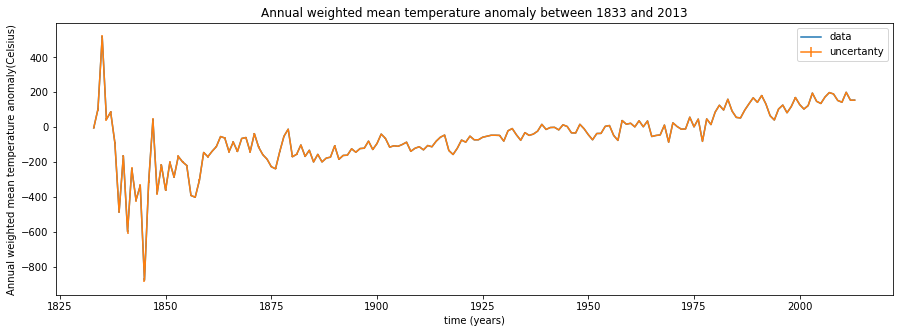

In [81]:
#weighted mean -- the lecture was not uploaded so I was not sure how to calculate the weight and used Chang-Li-Wens Solution to understand what to do--- I am still ot sure why we proceed like this
weighted_mean_year, weighted_unc_year = [],[]
Years = []
sum_Anomaly, sum_unc = 0, 0
for i in range(len(Month)):
    if pd.isna(Monthly_Unc[i]) == False:
        w = 1/Monthly_Unc[i]**2
        sum_Anomaly += Monthly_Anomaly[i]*w
        sum_unc += 1/w
    if i%12 == 0:
        weighted_mean_year.append(sum_Anomaly*sum_unc) 
        weighted_unc_year.append(np.sqrt(sum_unc))
        sum_Anomaly, sum_unc = 0, 0
        Years.append(Year[i])
plt.figure(figsize=(15, 5))
plt.title('Annual weighted mean temperature anomaly between 1833 and 2013')
plt.plot(Years, weighted_mean_year, label = "data")
plt.errorbar(Years, weighted_mean_year ,yerr = weighted_unc_year, label = "uncertanty")
plt.xlabel("time (years)")
plt.ylabel("Annual weighted mean temperature anomaly(Celsius)") 
plt.legend()


